# Hello, FABRIC: Create your first FABRIC slice

## Configure the Environment

Set the environment variable that will be used by this notebook. If you are using the FABRIC, JupyterHub some of the environment will be automatically configured for you.  You will only need to set your bastion username, upload your bastion private key, and set the path to where you put your bastion private key. Your bastion username and private key should already be in your possession.  If you do not have a bastion username and private key, please contact the FABRIC admins using the [FABRIC User Forum](https://learn.fabric-testbed.net/forums/) 

If you are using the FABRIC API outside of the JupyterHub you will need to configure all of the environment variables. Defaults below will be correct in many situations but you will need to confirm your configuration.  If you have questions about this configuration, please contact the FABRIC admins using the [FABRIC User Forum](https://learn.fabric-testbed.net/forums/) 

More information about accessing your experiments through the FABRIC bastion hosts can be found [here](https://learn.fabric-testbed.net/knowledge-base/logging-into-fabric-vms/).

In [1]:
import os

# If you are using the FABRIC JupyterHub, the following three evnrionment vars
# were automatically provided when you logged in.
#os.environ['FABRIC_CREDMGR_HOST']='cm.fabric-testbed.net'
#os.environ['FABRIC_ORCHESTRATOR_HOST']='orchestrator.fabric-testbed.net'
#os.environ['FABRIC_TOKEN_LOCATION']=os.environ['HOME']+'/work/fabric_token_beta.json'

# Bastion IPs
os.environ['FABRIC_BASTION_HOST'] = 'bastion-1.fabric-testbed.net'

# Set your Bastion username and private key
os.environ['FABRIC_BASTION_USERNAME']='pruth_0031379841'
os.environ['FABRIC_BASTION_KEY_LOCATION']=os.environ['HOME']+'/FABRIC/pruth-bastion-1'

# Set the keypair FABRIC will install in your slice. 
os.environ['FABRIC_SLICE_PRIVATE_KEY_FILE']=os.environ['HOME']+'/.ssh/id_rsa'
os.environ['FABRIC_SLICE_PUBLIC_KEY_FILE']=os.environ['HOME']+'/.ssh/id_rsa.pub'

# If your slice private key uses a passphrase, set the passphrase
#from getpass import getpass
#print('Please input private key passphrase. Press enter for no passphrase.')
#os.environ['FABRIC_SLICE_PRIVATE_KEY_PASSPHRASE']=getpass()

## Setup the Experiment

#### Import the FABRIC API

In [2]:
import json
import traceback
from fabrictestbed_extensions.fablib.fablib import fablib

#### Create the FABRIC Proxies

The FABRIC API is used via proxy objects that manage connections to the control framework.  

#### (Optional) Query Available Resources

This optional command queries the FABRIC services to find the available resources. It may be useful for finding a site with available capacity.

Available Resources: RENC [Site] : { cpu: 6/6 , core: 192/192 , ram: 1,536/1,536 G, disk: 60,600/60,600 G, unit: 3/3 }
	Components:
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
		RENC_UKY: TrunkPort { bw: 10/10 Gbps}
		RENC_LBNL: TrunkPort { bw: 10/10 Gbps}
LBNL [Site] : { cpu: 6/6 , core: 192/192 , ram: 1,536/1,536 G, disk: 60,600/60,600 G, unit: 3/3 }
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/

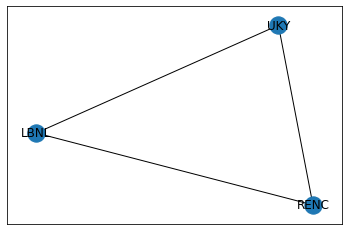

In [3]:
try:
    available_resources = fablib.get_available_resources()
    print(f"Available Resources: {available_resources}")
    available_resources.draw()
except Exception as e:
    print(f"Error: {e}")
    traceback.print_exc()

## Create the Experiment Slice

#### Configure the Experiment Parameters



In [4]:
slice_name_base = 'MySlice1'
#sites = [ 'UKY', 'RENC', 'LBNL' ]
sites = ['LBNL' ]
node_name_base = 'node'
image = 'default_centos_8'
cores = 2
ram = 8
disk = 10

node_count=5

tests = {}

for site in sites:
    nodes = {}
    
    node_num = 1

    #w1 
    worker = f'{site.lower()}-w1'
    #nic_type = 'NIC_Basic'
    #vlan = None
    #for basic_nic_num in range(1,11):
    #    ip = f'192.168.1.{node_num}'
    #    nodes[f"{worker}_{nic_type}{basic_nic_num}"] = { 'nic_type': nic_type, 'vlan': vlan, 'ip': {ip}, 'worker': f'{worker}.fabric-testbed.net'}
    #    node_num += 1
                
    ##w2
    worker = f'{site.lower()}-w2'
    #nic_type = 'NIC_ConnectX_6'
    #vlan = None
    #for basic_nic_num in range(1,3):
    #    ip = f'192.168.1.{node_num}'
    #    nodes[f"{worker}_{nic_type}{basic_nic_num}"] = { 'nic_type': nic_type, 'vlan': vlan, 'ip': {ip}, 'worker': f'{worker}.fabric-testbed.net'}
    #    node_num += 1
        
    nic_type = 'NIC_Basic'
    vlan = None
    for basic_nic_num in range(1,11):
        ip = f'192.168.1.{node_num}'
        nodes[f"{worker}_{nic_type}{basic_nic_num}"] = { 'nic_type': nic_type, 'vlan': vlan, 'ip': {ip}, 'worker': f'{worker}.fabric-testbed.net'}
        node_num += 1
        
    #w3
    worker = f'{site.lower()}-w3'
    #nic_type = 'NIC_ConnectX_5'
    #vlan = None
    #for basic_nic_num in range(1,2):
    #    ip = f'192.168.1.{node_num}'
    #    nodes[f"{worker}_{nic_type}{basic_nic_num}"] = { 'nic_type': nic_type, 'vlan': vlan, 'ip': {ip}, 'worker': f'{worker}.fabric-testbed.net'}
    #    node_num += 1
        
    #nic_type = 'NIC_Basic'
    #vlan = None
    #for basic_nic_num in range(1,11):
    #    ip = f'192.168.1.{node_num}'
    #    nodes[f"{worker}_{nic_type}{basic_nic_num}"] = { 'nic_type': nic_type, 'vlan': vlan, 'ip': {ip}, 'worker': f'{worker}.fabric-testbed.net'}
    #    node_num += 1
            

    tests[site] = nodes
    

print(f"{tests}")

{'LBNL': {'lbnl-w2_NIC_Basic1': {'nic_type': 'NIC_Basic', 'vlan': None, 'ip': {'192.168.1.1'}, 'worker': 'lbnl-w2.fabric-testbed.net'}, 'lbnl-w2_NIC_Basic2': {'nic_type': 'NIC_Basic', 'vlan': None, 'ip': {'192.168.1.2'}, 'worker': 'lbnl-w2.fabric-testbed.net'}, 'lbnl-w2_NIC_Basic3': {'nic_type': 'NIC_Basic', 'vlan': None, 'ip': {'192.168.1.3'}, 'worker': 'lbnl-w2.fabric-testbed.net'}, 'lbnl-w2_NIC_Basic4': {'nic_type': 'NIC_Basic', 'vlan': None, 'ip': {'192.168.1.4'}, 'worker': 'lbnl-w2.fabric-testbed.net'}, 'lbnl-w2_NIC_Basic5': {'nic_type': 'NIC_Basic', 'vlan': None, 'ip': {'192.168.1.5'}, 'worker': 'lbnl-w2.fabric-testbed.net'}, 'lbnl-w2_NIC_Basic6': {'nic_type': 'NIC_Basic', 'vlan': None, 'ip': {'192.168.1.6'}, 'worker': 'lbnl-w2.fabric-testbed.net'}, 'lbnl-w2_NIC_Basic7': {'nic_type': 'NIC_Basic', 'vlan': None, 'ip': {'192.168.1.7'}, 'worker': 'lbnl-w2.fabric-testbed.net'}, 'lbnl-w2_NIC_Basic8': {'nic_type': 'NIC_Basic', 'vlan': None, 'ip': {'192.168.1.8'}, 'worker': 'lbnl-w2.fabr

### Create Slice

<img src="./figs/SingleNode.png" width="20%"><br>

Create a single node with basic compute capabilities. The submit function will block until the node is ready and will display a progress bar.


In [5]:
for site,nodes in tests.items():
    slice_name=f"{slice_name_base}_{site}"
    print(f"Creating slice {slice_name} on worker {site}")
    #Create Slice
    slice = fablib.new_slice(slice_name)
    
    try:
        ifaces = []
        for node_name, node_config in nodes.items():
            #node_name = f"{node_name_base}{node_num}"
            # Add node
            node = slice.add_node(name=node_name, site=site)
            node.set_capacities(cores=cores, ram=ram, disk=disk)
            node.set_image(image)
            node.set_host(node_config['worker'])
            iface = node.add_component(model=node_config['nic_type'], name=f"{node_name}NIC").get_interfaces()[0]
            #if not node_config['nic_type'] == 'NIC_Basic':
            #    iface.set_vlan("1234")
            ifaces.append(iface)
            
            
            
        net = slice.add_l2network(name='net1', interfaces=ifaces)
        
        #Submit Slice Request
        slice.submit(wait_progress=False)

    except Exception as e:
        print(f"Slice Failed: {e}")
        #traceback.print_exc()
        
        

Creating slice MySlice1_LBNL on worker LBNL


In [6]:
for site,nodes in tests.items():
    slice_name=f"{slice_name_base}_{site}"

    try:
            
        
        print(f"Waiting for slice {slice_name} at {site}")

        #Get Slice
        slice = fablib.get_slice(slice_name)

        #Wait for ssh to be active
        slice.wait_ssh(progress=True)

        #Run post boot config
        slice.post_boot_config(verbose=True)
    except Exception as e:
        print(f"Slice Failed: {e}")
        traceback.print_exc()

Waiting for slice MySlice1_LBNL at LBNL
Waiting for slice .... Slice state: StableOK
Waiting for ssh in slice .. ssh successful
post_boot_config
build_interface_map
Buiding iface map for network: net1
ssh -i /Users/pruth/.ssh/id_rsa -J pruth_0031379841@bastion-1.fabric-testbed.net centos@198.129.61.34
target_node: lbnl-w2_NIC_Basic1
target_iface: lbnl-w2_NIC_Basic1-lbnl-w2_NIC_Basic1NIC-p1
target_iface.get_vlan(): None
target_os_ifaces: [{'ifname': 'eth1', 'mac': 'ea:f7:96:10:95:88'}]
test_node: lbnl-w2_NIC_Basic2: ssh -i /Users/pruth/.ssh/id_rsa -J pruth_0031379841@bastion-1.fabric-testbed.net centos@198.129.61.55
Ping test result: lbnl-w2_NIC_Basic2:eth1 ->  - 192.168.1.2 to 192.168.1.1: False
test_node: lbnl-w2_NIC_Basic3: ssh -i /Users/pruth/.ssh/id_rsa -J pruth_0031379841@bastion-1.fabric-testbed.net centos@198.129.61.36
Ping test result: lbnl-w2_NIC_Basic3:eth1 ->  - 192.168.1.2 to 192.168.1.1: False
test_node: lbnl-w2_NIC_Basic4: ssh -i /Users/pruth/.ssh/id_rsa -J pruth_00313798

In [ ]:
#slice.build_interface_map(verbose=True)
print(f"{slice.get_interface_map()}")

### Get the New Slice

Your new slice is in the list of all your slices. You can get the specific slice using the fablib library.

In [ ]:
for site,workers in tests.items():
    for worker in workers:
        try:
            slice_name=f"{slice_name_base}_{worker}"
            print(f"Getting {slice_name} slice at {site}")

            slice = fablib.get_slice(slice_name)
            print(f"Slice: {slice.get_name()}, {slice.get_state()}")
        except Exception as e:
            print(f"Get Slices Fail: {e}")

### Print the Node's Attributes

Each node in the slice has a set of get functions that return the node's attributes.

In [ ]:
for site,nodes in tests.items():
    slice_name=f"{slice_name_base}_{site}"

    try:
        print(f"Get attributes for {slice_name} at {site}")    
        slice = fablib.get_slice(slice_name)
        for node in slice.get_nodes():
            print("Node:")
            print(f"   Name              : {node.get_name()}")
            print(f"   Cores             : {node.get_cores()}")
            print(f"   RAM               : {node.get_ram()}")
            print(f"   Disk              : {node.get_disk()}")
            print(f"   Image             : {node.get_image()}")
            print(f"   Image Type        : {node.get_image_type()}")
            print(f"   Host              : {node.get_host()}")
            print(f"   Site              : {node.get_site()}")
            print(f"   Management IP     : {node.get_management_ip()}")
            print(f"   Reservation ID    : {node.get_reservation_id()}")
            print(f"   Reservation State : {node.get_reservation_state()}")
            print(f"   Components        : {node.get_components()}")
            print(f"   Interfaces        : {node.get_interfaces()}")
            print(f"   SSH Command       : {node.get_ssh_command()}")
            for component in node.get_components():
                print(f"      Name             : {component.get_name()}")
                print(f"      Details          : {component.get_details()}")
                print(f"      Disk (G)         : {component.get_disk()}")
                print(f"      Units            : {component.get_unit()}")
                print(f"      PCI Address      : {component.get_pci_addr()}")
                print(f"      Model            : {component.get_model()}")
                print(f"      Type             : {component.get_type()}") 
            print(f"   Interfaces        :  ")
            for interface in node.get_interfaces():
                print(f"       Name                : {interface.get_name()}")
                print(f"           Bandwidth           : {interface.get_bandwidth()}")
                print(f"           VLAN                : {interface.get_vlan()}")       
                print(f"           OS Interface        : {interface.get_os_interface()}")       
            print()    
    except Exception as e:
        print(f"Fail: {e}")

## Accessing the VM



#### SSH with fablib

Most experiments will require automated configuration and execution. You can use the fablib library to execute arbitrary commands on your node. 

The following code demonstrates how to use fablib to execute a "Hello, FABRIC" bash script. The library uses the bastion and VM keys defined at the top of this notebook to jump through the bastion host and execute the script.

In [ ]:
command= 'echo Hello, FABRIC from node `hostname -s`'

In [ ]:
for site,nodes in tests.items():
    slice_name=f"{slice_name_base}_{site}"   
    try:
        print(f"Executing command for {slice_name} at {site}")    
        slice = fablib.get_slice(slice_name)
        for node in slice.get_nodes():
            stdout, stderr = node.execute(command)
            print(stdout)
    except Exception as e:
        print(f"Fail: {e}")

## Delete Slice

Please delete your slicd when you are done with your experiment.

In [7]:
for site,nodes in tests.items():
    slice_name=f"{slice_name_base}_{site}"
    #Create Slice
    try:

        print(f"Deleting for {slice_name} at {site}")    
        slice = fablib.get_slice(slice_name)
        slice.delete()
    except Exception as e:
        print(f"Fail: {e}")

Deleting for MySlice1_LBNL at LBNL
